In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [100]:
res = loadmat('matlab.mat')
with open('test.out','r') as f:
    text = f.read()
text = text.split('\n')

In [109]:
d = np.array(res['res_d'][0], dtype = int)
eps = np.array(res['res_eps'][0], dtype = float)
loss = np.array(res['res_loss'][0], dtype = float)
npoint = np.array(res['res_npoint'][0], dtype = int)
max_len = d.shape[0]

uq = [float(text[i+2]) for i,t in enumerate(text) if t == 'u_q =']
uq = uq[:max_len]

In [110]:
dat_dict = {
    'd':d,
    'eps':eps,
    'loss':loss,
    'npoint':npoint,
    'uq':uq
}

In [125]:
data = pd.DataFrame(dat_dict)
data = data[data.d==1]

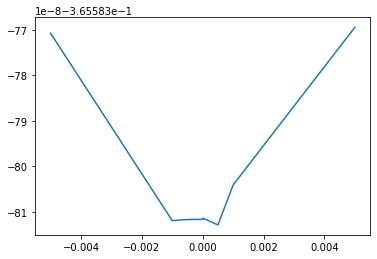

In [35]:
y = np.array(data[data['npoint'] == 16].sort_values('eps')['loss'])
x = np.array(data[data['npoint'] == 16].sort_values('eps')['eps'])
plt.plot(x,y)

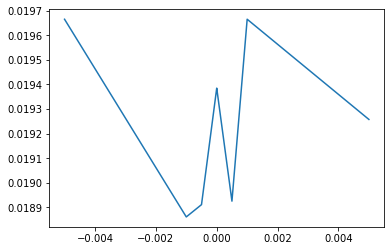

In [112]:
y = np.array(data[data['npoint'] == 16].sort_values('eps')['uq'])
x = np.array(data[data['npoint'] == 16].sort_values('eps')['eps'])
plt.plot(x,y)

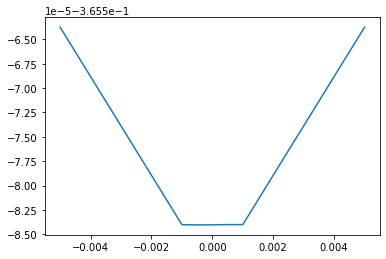

In [37]:
n = 64
y = np.array(data[data['npoint'] == n].sort_values('eps')['loss'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

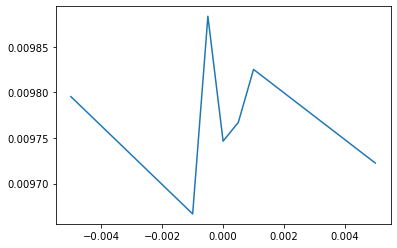

In [113]:
n = 64
y = np.array(data[data['npoint'] == n].sort_values('eps')['uq'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

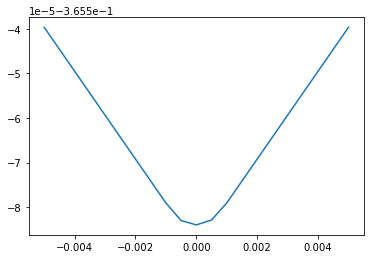

In [67]:
n = 256
z =  data[(data.npoint == n) & (data.eps == 0)]['loss'].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')['loss'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

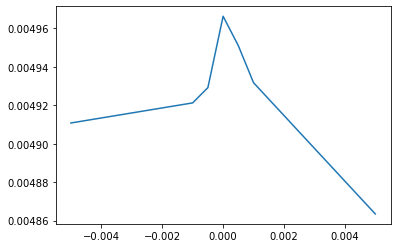

In [115]:
n = 256
z =  data[(data.npoint == n) & (data.eps == 0)]['uq'].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')['uq'])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y)

<ipython-input-117-b5064592e9e1>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, np.log10(abs(y-z)))


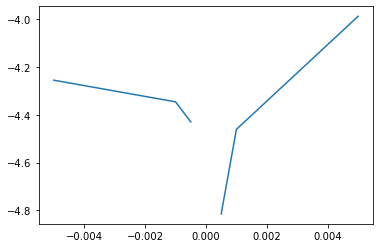

In [117]:
plt.plot(x, np.log10(abs(y-z)))

In [80]:
eps = 5e-3

n = 256
# eps = 5e-3
x1 = data[(data.npoint == n) & (data.eps == eps)]['loss'].item()
x2 = data[(data.npoint == n) & (data.eps == -eps)]['loss'].item()
deri = (x1 - x2) / (2 * eps)
deri256 = deri

n = 64
# eps = 5e-3
x1 = data[(data.npoint == n) & (data.eps == eps)]['loss'].item()
x2 = data[(data.npoint == n) & (data.eps == -eps)]['loss'].item()
deri = (x1 - x2) / (2 * eps)
deri64 = deri

n = 16
# eps = 5e-3
x1 = data[(data.npoint == n) & (data.eps == eps)]['loss'].item()
x2 = data[(data.npoint == n) & (data.eps == -eps)]['loss'].item()
deri = (x1 - x2) / (2 * eps)
deri16 = deri

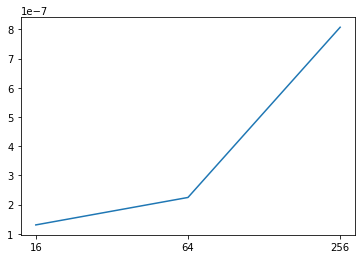

In [81]:
plt.plot(['16','64','256'], [deri16, deri64, deri256])

In [52]:
x2

-0.3655790801141029

In [82]:
with open('test.out','r') as f:
    text = f.read()
text = text.split('\n')

In [85]:
text = text.split('\n')

In [98]:
uq = [float(text[i+2]) for i,t in enumerate(text) if t == 'u_q =']

In [99]:
uq

[0.019384854464177,
 0.009746486812211,
 0.004966298991687,
 0.019257391935054,
 0.009722515071168,
 0.004863473018722,
 0.019665277433348,
 0.009825183558538,
 0.004931729938919,
 0.0189248272107,
 0.009767084114316,
 0.004950992232231,
 0.019665262547568,
 0.009795347668337,
 0.004910776846609,
 0.018860638347552,
 0.009666709033792,
 0.004921221314666,
 0.01891064338254,
 0.009883511054177,
 0.004929157269567,
 0.019384854464121,
 0.009746486812181]

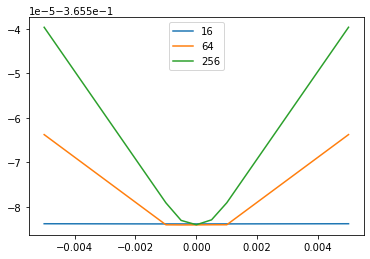

In [127]:
plt_val = 'loss'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)
plt.legend()

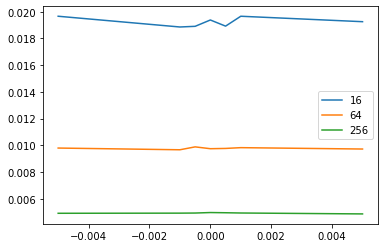

In [129]:
plt_val = 'uq'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
plt.plot(x,y, label = n)
plt.legend()

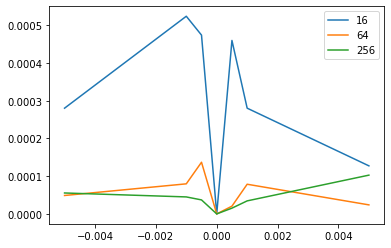

In [131]:
plt_val = 'uq'

n = 16
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

n = 64
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

n = 256
z =  data[(data.npoint == n) & (data.eps == 0)][plt_val].item()
y = np.array(data[data['npoint'] == n].sort_values('eps')[plt_val])
x = np.array(data[data['npoint'] == n].sort_values('eps')['eps'])
y = np.abs(y-z)
plt.plot(x,y, label = n)

plt.plot()
plt.legend()

In [132]:
x

array([-0.005 , -0.001 , -0.0005,  0.    ,  0.0005,  0.001 ,  0.005 ])